In [153]:
# Beginning notebook
# Import dependancies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [154]:
raw_df = pd.read_csv("Python-API-Project/edited_dataset.csv") # Call in csv data
raw_df['final_total'] = raw_df['score_home'] + raw_df['score_away'] # Create new columns
raw_df['True Spread']=0 # Create new columns
raw_df['Spread Outcome'] = 0 # Create new columns
raw_df['Total Outcome'] = 0 # Create new columns

# Rename all columns
raw_df = raw_df.rename(columns = {'schedule_date':'Date', 'schedule_season':'Season', 'schedule_week':'Week',
                                  'schedule_playoff':'Playoff Game', 'team_home':'Home Team','score_home':'Home Final',
                                  'score_away':'Away Final','team_away':'Away Team', 'team_favorite_id':'Favorite',
                                  'spread_favorite':'Spread', 'over_under_line':'Over/Under', 'stadium':'Location',
                                  'stadium_neutral':'Neutral Site','weather_temperature':'Temperature','weather_wind_mph':'Wind(MPH)',
                                  'weather_humidity':'Humidity', 'weather_detail':'Location Detail','final_total':'Total'
                                  
                                 })
# Reorder all columns
raw_df = raw_df[['Date', 'Season','Week','Playoff Game','Home Team','Home Final','True Spread','Away Final','Away Team',
                'Favorite','Spread','Over/Under','Total','Spread Outcome','Total Outcome','Location','Neutral Site','Temperature','Wind(MPH)','Humidity',
                'Location Detail']]

In [155]:
# Convert all home team column values to acronym to match favorite column
home_replaced = raw_df.replace({'Home Team' : {'New Orleans Saints':'NO', 'Miami Dolphins':'MIA','Chicago Bears':'CHI',
                                        'Buffalo Bills':'BUF','Houston Texans':'HOU', 'Jacksonville Jaguars':'JAX', 
                                        'New England Patriots':'NE','New York Giants':'NYG','Philadelphia Eagles':'PHI',
                                       'Pittsburgh Steelers':'PIT', 'Seattle Seahawks':'SEA','St. Louis Rams':'LAR',
                                       'Tampa Bay Buccaneers':'TB','Tennessee Titans':'TEN','Washington Redskins':'WAS',
                                       'Kansas City Chiefs':'KC','New York Jets':'NYJ','Atlanta Falcons':'ATL',
                                       'Carolina Panthers':'CAR','Cincinnati Bengals':'CIN','Cleveland Browns':'CLE',
                                       'Dallas Cowboys':'DAL','Denver Broncos':'DEN','Detroit Lions':'DET','Green Bay Packers':
                                       'GB','Indianapolis Colts':'IND','Minnesota Vikings':'MIN','Oakland Raiders':'OAK',
                                       'San Diego Chargers':'LAC','San Francisco 49ers':'SF','Arizona Cardinals':'ARI',
                                       'Baltimore Ravens':'BAL','Miami Dolphins':'MIA','Los Angeles Rams':'LAR',
                                       'Los Angeles Chargers':'LAC'}})

new_df = home_replaced.replace({'Away Team' : {'New Orleans Saints':'NO', 'Miami Dolphins':'MIA','Chicago Bears':'CHI',
                                        'Buffalo Bills':'BUF','Houston Texans':'HOU', 'Jacksonville Jaguars':'JAX', 
                                        'New England Patriots':'NE','New York Giants':'NYG','Philadelphia Eagles':'PHI',
                                       'Pittsburgh Steelers':'PIT', 'Seattle Seahawks':'SEA','St. Louis Rams':'LAR',
                                       'Tampa Bay Buccaneers':'TB','Tennessee Titans':'TEN','Washington Redskins':'WAS',
                                       'Kansas City Chiefs':'KC','New York Jets':'NYJ','Atlanta Falcons':'ATL',
                                       'Carolina Panthers':'CAR','Cincinnati Bengals':'CIN','Cleveland Browns':'CLE',
                                       'Dallas Cowboys':'DAL','Denver Broncos':'DEN','Detroit Lions':'DET','Green Bay Packers':
                                       'GB','Indianapolis Colts':'IND','Minnesota Vikings':'MIN','Oakland Raiders':'OAK',
                                       'San Diego Chargers':'LAC','San Francisco 49ers':'SF','Arizona Cardinals':'ARI',
                                       'Baltimore Ravens':'BAL','Miami Dolphins':'MIA','Los Angeles Rams':'LAR',
                                       'Los Angeles Chargers':'LAC'}})


In [156]:
# Solving for if the favorite covered
def func(row):
    if row['Favorite'] == row['Home Team']:
        return row['Home Final'] + row['Spread'] - row['Away Final']
    else:
        return row['Away Final'] + row['Spread'] - row['Home Final']
        
new_df['True Spread'] = new_df.apply(func, axis=1)

In [157]:
def spread(row):
    if row['True Spread'] > 0:
        return "FAV"
    elif row['True Spread'] < 0:
        return "DOG"
    else:
        return "PUSH"

new_df['Spread Outcome'] = new_df.apply(spread, axis=1)
new_df

,Date,Season,Week,Playoff Game,Home Team,Home Final,True Spread,Away Final,Away Team,Favorite,...,Over/Under,Total,Spread Outcome,Total Outcome,Location,Neutral Site,Temperature,Wind(MPH),Humidity,Location Detail
0,9/9/2010,2010,1,False,NO,14,0.0,9,MIN,NO,...,49.5,23,PUSH,0,Louisiana Superdome,False,72.0,0.0,NaN,DOME
1,9/12/2010,2010,1,False,BUF,10,2.0,15,MIA,MIA,...,39.0,25,FAV,0,Ralph Wilson Stadium,False,64.0,7.0,81.0,NaN
2,9/12/2010,2010,1,False,CHI,19,-1.5,14,DET,CHI,...,45.0,33,DOG,0,Soldier Field,False,75.0,1.0,45.0,NaN
3,9/12/2010,2010,1,False,HOU,34,-11.0,24,IND,IND,...,48.0,58,DOG,0,Reliant Stadium,False,89.0,5.0,NaN,DOME (Open Roof)
4,9/12/2010,2010,1,False,JAX,24,4.0,17,DEN,JAX,...,41.5,41,FAV,0,EverBank Field,False,91.0,1.0,67.0,NaN
5,9/12/2010,2010,1,False,NE,38,8.5,24,CIN,NE,...,45.0,62,FAV,0,Gillette Stadium,False,63.0,10.0,NaN,NaN
6,9/12/2010,2010,1,False,NYG,31,7.0,18,CAR,NYG,...,41.0,49,FAV,0,MetLife Stadium,False,65.0,1.0,67.0,Rain
7,9/12/2010,2010,1,False,PHI,20,4.0,27,GB,GB,...,48.0,47,FAV,0,Lincoln Financial Field,False,69.0,4.0,72.0,NaN
8,9/12/2010,2010,1,False,PIT,15,-7.5,9,ATL,ATL,...,39.5,24,DOG,0,Heinz Field,False,65.0,9.0,67.0,NaN
9,9/12/2010,2010,1,False,SEA,31,-28.0,6,SF,SF,...,37.0,37,DOG,0,CenturyLink Field,False,64.0,11.0,NaN,NaN


In [158]:
def total(row):
    if row['Total'] < row['Over/Under']:
        return "UNDER"
    elif row['Total'] > row['Over/Under']:
        return "Over"
    else:
        return "PUSH"

new_df['Total Outcome'] = new_df.apply(total, axis=1)
final_df = pd.DataFrame(new_df)

In [159]:
highest_total = final_df.max(axis=0)['Over/Under']
lowest_total = final_df.min(axis=0)['Over/Under']
highest_spread = final_df.min(axis=0)['Spread']
lowest_spread = final_df.max(axis=0)['Spread']
biggest_fav_margin = final_df.max(axis=0)['True Spread']
biggest_dog_margin = final_df.min(axis=0)['True Spread']
print(f'The highest over/under total was:  {highest_total}')
print(f'The Lowest over/under total was:  {lowest_total}')
print(f'The biggest spread was:  {highest_spread}')
print(f'The lowest spread was:  {lowest_spread}')
print(f'The biggest margin the favorite won by was:  {biggest_fav_margin}')
print(f'The biggest margin the dog won by was:  {biggest_dog_margin}')


The highest over/under total was:  63.5
The Lowest over/under total was:  33.0
The biggest spread was:  -26.5
The lowest spread was:  0.0
The biggest margin the favorite won by was:  48.0
The biggest margin the dog won by was:  -52.0


In [160]:
def homeaway(row):
    if row['Home Final'] > row['Away Final']:
        return "Home Win"
    else:
        return "Away Win"

new_df['Home Away Winner'] = new_df.apply(homeaway, axis=1)

def homecover(row):
    if row['Home Team'] == row['Favorite'] and row['Spread Outcome'] == "FAV":
        return "Home Favorite Cover"
    elif row['Away Team'] == row['Favorite'] and row['Spread Outcome'] == "DOG":
            return "Home Dog Cover"
    elif row['Away Team'] == row['Favorite'] and row['Spread Outcome'] == "FAV":
            return "Away Favorite Cover"
    elif row['Home Team'] == row['Favorite'] and row['Spread Outcome'] == "DOG":
            return "Away Dog Cover"
    else:
        return "PUSH"
new_df['Location Cover'] = new_df.apply(homecover, axis=1)
new_df.head()

,Date,Season,Week,Playoff Game,Home Team,Home Final,True Spread,Away Final,Away Team,Favorite,...,Spread Outcome,Total Outcome,Location,Neutral Site,Temperature,Wind(MPH),Humidity,Location Detail,Home Away Winner,Location Cover
0,9/9/2010,2010,1,False,NO,14,0.0,9,MIN,NO,...,PUSH,UNDER,Louisiana Superdome,False,72.0,0.0,NaN,DOME,Home Win,PUSH
1,9/12/2010,2010,1,False,BUF,10,2.0,15,MIA,MIA,...,FAV,UNDER,Ralph Wilson Stadium,False,64.0,7.0,81.0,NaN,Away Win,Away Favorite Cover
2,9/12/2010,2010,1,False,CHI,19,-1.5,14,DET,CHI,...,DOG,UNDER,Soldier Field,False,75.0,1.0,45.0,NaN,Home Win,Away Dog Cover
3,9/12/2010,2010,1,False,HOU,34,-11.0,24,IND,IND,...,DOG,Over,Reliant Stadium,False,89.0,5.0,NaN,DOME (Open Roof),Home Win,Home Dog Cover
4,9/12/2010,2010,1,False,JAX,24,4.0,17,DEN,JAX,...,FAV,UNDER,EverBank Field,False,91.0,1.0,67.0,NaN,Home Win,Home Favorite Cover


In [161]:
reduced_new_df = new_df[["Date", "Location", "Home Team", "Away Team","Favorite","Spread", "Home Final", "Away Final", "Location Cover", "Over/Under", "Total Outcome"]]
reduced_new_df.head()

,Date,Location,Home Team,Away Team,Favorite,Spread,Home Final,Away Final,Location Cover,Over/Under,Total Outcome
0,9/9/2010,Louisiana Superdome,NO,MIN,NO,-5.0,14,9,PUSH,49.5,UNDER
1,9/12/2010,Ralph Wilson Stadium,BUF,MIA,MIA,-3.0,10,15,Away Favorite Cover,39.0,UNDER
2,9/12/2010,Soldier Field,CHI,DET,CHI,-6.5,19,14,Away Dog Cover,45.0,UNDER
3,9/12/2010,Reliant Stadium,HOU,IND,IND,-1.0,34,24,Home Dog Cover,48.0,Over
4,9/12/2010,EverBank Field,JAX,DEN,JAX,-3.0,24,17,Home Favorite Cover,41.5,UNDER


In [162]:

stadium = new_df.groupby(["Location Cover", "Home Team"]).count()['Date']
stadium_df = pd.DataFrame(stadium)
stadium_df.reset_index()
cover_count = stadium_df.unstack(0)
cover_count.reset_index(inplace=True)
cover_count.head(1)
cover_count.columns = cover_count.columns.get_level_values(1)
cover_count.fillna(0, inplace=True)
cover_count["Total"] =cover_count["Away Dog Cover"] + cover_count["Away Favorite Cover"] + cover_count["Home Dog Cover"] + cover_count["Home Favorite Cover"] + cover_count["PUSH"]
cover_count_homedf = pd.DataFrame(cover_count)
cover_count_homedf




Location Cover,,Away Dog Cover,Away Favorite Cover,Home Dog Cover,Home Favorite Cover,PUSH,Total
0,ARI,24.0,13.0,18.0,16.0,2.0,73.0
1,ATL,35.0,3.0,10.0,27.0,2.0,77.0
2,BAL,36.0,4.0,4.0,27.0,4.0,75.0
3,BUF,19.0,14.0,17.0,18.0,4.0,72.0
4,CAR,21.0,13.0,13.0,28.0,1.0,76.0
5,CHI,22.0,16.0,15.0,18.0,4.0,75.0
6,CIN,25.0,8.0,13.0,24.0,4.0,74.0
7,CLE,17.0,25.0,21.0,7.0,2.0,72.0
8,DAL,36.0,8.0,12.0,17.0,2.0,75.0
9,DEN,33.0,11.0,13.0,23.0,1.0,81.0


In [163]:
stadiumaway = new_df.groupby(["Location Cover", "Away Team"]).count()['Date']
stadium_awaydf = pd.DataFrame(stadiumaway)
stadium_awaydf.reset_index()
cover_countaway = stadium_awaydf.unstack(0)
cover_countaway.reset_index(inplace=True)
cover_countaway.head(1)
cover_countaway.columns = cover_countaway.columns.get_level_values(1)
cover_countaway.fillna(0, inplace=True)
cover_countaway["Total"] =cover_countaway["Away Dog Cover"] + cover_countaway["Away Favorite Cover"] + cover_countaway["Home Dog Cover"] + cover_countaway["Home Favorite Cover"] + cover_countaway["PUSH"]
cover_count_awaydf = pd.DataFrame(cover_countaway)
cover_count_awaydf

Location Cover,,Away Dog Cover,Away Favorite Cover,Home Dog Cover,Home Favorite Cover,PUSH,Total
0,ARI,24.0,11.0,9.0,28.0,2.0,74.0
1,ATL,18.0,17.0,18.0,21.0,2.0,76.0
2,BAL,27.0,14.0,16.0,17.0,6.0,80.0
3,BUF,27.0,4.0,7.0,32.0,3.0,73.0
4,CAR,25.0,10.0,17.0,20.0,3.0,75.0
5,CHI,28.0,9.0,8.0,26.0,1.0,72.0
6,CIN,27.0,13.0,9.0,20.0,6.0,75.0
7,CLE,28.0,3.0,2.0,34.0,5.0,72.0
8,DAL,25.0,15.0,13.0,18.0,3.0,74.0
9,DEN,14.0,21.0,17.0,19.0,2.0,73.0


In [164]:
combined_df = pd.merge(cover_count_homedf,cover_count_awaydf, on='')

total  = combined_df['Total_x'] + combined_df['Total_y']
awaydogcover  = combined_df['Away Dog Cover_x'] + combined_df['Away Dog Cover_y']
awayfavoritecover  = combined_df['Away Favorite Cover_x'] + combined_df['Away Favorite Cover_y']
homedogcover  = combined_df['Home Dog Cover_x'] + combined_df['Home Dog Cover_y']
homefavoritecover = combined_df['Home Favorite Cover_x'] + combined_df['Home Favorite Cover_y']
push = combined_df['PUSH_x'] + combined_df['PUSH_y']
combined_df['Total'] = total
combined_df['Away Dog Cover'] = awaydogcover
combined_df['Away Favorite Cover'] = awayfavoritecover
combined_df['Home Dog Cover'] = homedogcover
combined_df['Home Favorite Cover'] = homefavoritecover
combined_df['Push'] = push
reduced_combined_df = combined_df[['', 'Total', 'Away Dog Cover', 'Away Favorite Cover', 'Home Dog Cover', 'Home Favorite Cover', 'Push']]
reduced_combined_df

Location Cover,,Total,Away Dog Cover,Away Favorite Cover,Home Dog Cover,Home Favorite Cover,Push
0,ARI,147.0,48.0,24.0,27.0,44.0,4.0
1,ATL,153.0,53.0,20.0,28.0,48.0,4.0
2,BAL,155.0,63.0,18.0,20.0,44.0,10.0
3,BUF,145.0,46.0,18.0,24.0,50.0,7.0
4,CAR,151.0,46.0,23.0,30.0,48.0,4.0
5,CHI,147.0,50.0,25.0,23.0,44.0,5.0
6,CIN,149.0,52.0,21.0,22.0,44.0,10.0
7,CLE,144.0,45.0,28.0,23.0,41.0,7.0
8,DAL,149.0,61.0,23.0,25.0,35.0,5.0
9,DEN,154.0,47.0,32.0,30.0,42.0,3.0


In [165]:
combined_df.head()

Location Cover,,Away Dog Cover_x,Away Favorite Cover_x,Home Dog Cover_x,Home Favorite Cover_x,PUSH_x,Total_x,Away Dog Cover_y,Away Favorite Cover_y,Home Dog Cover_y,Home Favorite Cover_y,PUSH_y,Total_y,Total,Away Dog Cover,Away Favorite Cover,Home Dog Cover,Home Favorite Cover,Push
0,ARI,24.0,13.0,18.0,16.0,2.0,73.0,24.0,11.0,9.0,28.0,2.0,74.0,147.0,48.0,24.0,27.0,44.0,4.0
1,ATL,35.0,3.0,10.0,27.0,2.0,77.0,18.0,17.0,18.0,21.0,2.0,76.0,153.0,53.0,20.0,28.0,48.0,4.0
2,BAL,36.0,4.0,4.0,27.0,4.0,75.0,27.0,14.0,16.0,17.0,6.0,80.0,155.0,63.0,18.0,20.0,44.0,10.0
3,BUF,19.0,14.0,17.0,18.0,4.0,72.0,27.0,4.0,7.0,32.0,3.0,73.0,145.0,46.0,18.0,24.0,50.0,7.0
4,CAR,21.0,13.0,13.0,28.0,1.0,76.0,25.0,10.0,17.0,20.0,3.0,75.0,151.0,46.0,23.0,30.0,48.0,4.0


In [166]:
teams


0     ARI
1     ATL
2     BAL
3     BUF
4     CAR
5     CHI
6     CIN
7     CLE
8     DAL
9     DEN
10    DET
11     GB
12    HOU
13    IND
14    JAX
15     KC
16    LAC
17    LAR
18    MIA
19    MIN
20     NE
21     NO
22    NYG
23    NYJ
24    OAK
25    PHI
26    PIT
27    SEA
28     SF
29     TB
30    TEN
31    WAS
Name: , dtype: object

In [167]:
total_df =  combined_df[['', 'Total', 'Away Dog Cover', 'Away Favorite Cover', 'Home Dog Cover', 'Home Favorite Cover', 'Push']]
total_df
away_dog_cover = combined_df['Away Dog Cover'] / combined_df['Total'] * 100
away_fav_cover = combined_df['Away Favorite Cover'] / combined_df['Total'] * 100
home_dog_cover = combined_df['Home Dog Cover'] / combined_df['Total'] * 100
home_fav_cover = combined_df['Home Favorite Cover'] / combined_df['Total'] * 100
push = combined_df['Push'] / combined_df['Total'] * 100
teams = combined_df['']

percentage_df = pd.DataFrame({'Teams': teams,
                              'Away Dog Cover Percentage': away_dog_cover,
                             'Away Favorite Cover': away_fav_cover,
                             'Home Dog Cover' : home_dog_cover,
                             'Home Favorite Cover': home_fav_cover,
                             'Push' : push})
percentage_df
home_dog_cover_percentage = home_dog_cover / (away_fav_cover + home_dog_cover)
home_fav_cover_percentage = home_fav_cover / (away_dog_cover + home_fav_cover)

rev_percentage_df = pd.DataFrame({'Teams': teams,
                                 'Home Dog Cover Percent': home_dog_cover_percentage,
                                  'Away Favorite Cover Percent': 1 - home_dog_cover_percentage,
                                 'Home Favorite Cover Percent': home_fav_cover_percentage,
                                 'Away Dog Cover Percent': 1 - home_fav_cover_percentage})
rev_percentage_df



,Teams,Home Dog Cover Percent,Away Favorite Cover Percent,Home Favorite Cover Percent,Away Dog Cover Percent
0,ARI,0.529412,0.470588,0.478261,0.521739
1,ATL,0.583333,0.416667,0.475248,0.524752
2,BAL,0.526316,0.473684,0.411215,0.588785
3,BUF,0.571429,0.428571,0.520833,0.479167
4,CAR,0.566038,0.433962,0.510638,0.489362
5,CHI,0.479167,0.520833,0.468085,0.531915
6,CIN,0.511628,0.488372,0.458333,0.541667
7,CLE,0.450980,0.549020,0.476744,0.523256
8,DAL,0.520833,0.479167,0.364583,0.635417
9,DEN,0.483871,0.516129,0.471910,0.528090


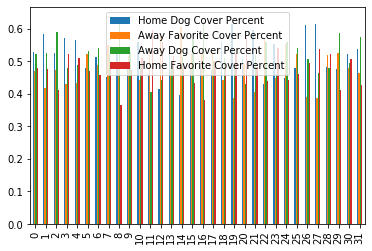

In [168]:

rev_percentage_df[['Home Dog Cover Percent','Away Favorite Cover Percent','Away Dog Cover Percent', 'Home Favorite Cover Percent']].plot(kind='bar', title ="")


In [169]:
rev_percentage_df

,Teams,Home Dog Cover Percent,Away Favorite Cover Percent,Home Favorite Cover Percent,Away Dog Cover Percent
0,ARI,0.529412,0.470588,0.478261,0.521739
1,ATL,0.583333,0.416667,0.475248,0.524752
2,BAL,0.526316,0.473684,0.411215,0.588785
3,BUF,0.571429,0.428571,0.520833,0.479167
4,CAR,0.566038,0.433962,0.510638,0.489362
5,CHI,0.479167,0.520833,0.468085,0.531915
6,CIN,0.511628,0.488372,0.458333,0.541667
7,CLE,0.450980,0.549020,0.476744,0.523256
8,DAL,0.520833,0.479167,0.364583,0.635417
9,DEN,0.483871,0.516129,0.471910,0.528090


In [170]:
rev_percentage_dff = pd.DataFrame.round(rev_percentage_df.copy(),2) 
rev_percentage_df = list(rev_percentage_dff.columns)
for i in range(1, len(rev_percentage_df)):
    rev_percentage_dff[rev_percentage_df[i]] = rev_percentage_dff[rev_percentage_df[i]].astype(str) + '%'
rev_percentage_dff

,Teams,Home Dog Cover Percent,Away Favorite Cover Percent,Home Favorite Cover Percent,Away Dog Cover Percent
0,ARI,0.53%,0.47%,0.48%,0.52%
1,ATL,0.58%,0.42%,0.48%,0.52%
2,BAL,0.53%,0.47%,0.41%,0.59%
3,BUF,0.57%,0.43%,0.52%,0.48%
4,CAR,0.57%,0.43%,0.51%,0.49%
5,CHI,0.48%,0.52%,0.47%,0.53%
6,CIN,0.51%,0.49%,0.46%,0.54%
7,CLE,0.45%,0.55%,0.48%,0.52%
8,DAL,0.52%,0.48%,0.36%,0.64%
9,DEN,0.48%,0.52%,0.47%,0.53%


In [172]:

hd = rev_percentage_dff.iloc[9,1]
af = rev_percentage_dff.iloc[9,2]
hf = rev_percentage_dff.iloc[9,3]
ad = rev_percentage_dff.iloc[9,4]
hd2 = rev_percentage_dff.iloc[20,1]
af2 = rev_percentage_dff.iloc[20,2]
hf2 = rev_percentage_dff.iloc[20,3]
ad2 = rev_percentage_dff.iloc[20,4]
hd3 = rev_percentage_dff.iloc[27,1]
af3 = rev_percentage_dff.iloc[27,2]
hf3 = rev_percentage_dff.iloc[27,3]
ad3 = rev_percentage_dff.iloc[27,4]
homedog = [hd,hd2,hd3]
awayfav = [af,af2,af3]
homefav = [hf,hf2,hf3]
awaydog = [ad,ad2,ad3]
index = ['DAL','MIN','PIT']

df = pd.DataFrame({'Home Dog Cover Percentage': homedog,'Away Favorite Cover Percentage': awayfav,'Home Favorite Cover Percentage': homefav,'Away Dog Cover Percentage': awaydog, index=index)

ax = df.plot.bar(figsize=(20,10),rot=0)

SyntaxError: invalid syntax (<ipython-input-172-e1bb7b40eba4>, line 19)

In [144]:

x = rev_percentage_dff['Teams'][['DAL', 'MIN', 'PIT']]
y = rev_percentage_dff['Home Dog Cover Percent', 'Away Favorite Cover Percent', 'Home Favorite Cover Percent', 'Away Dog Cover Percent']
plt.plot(x, y, kind='bar', index=index)
plt.xlabel("Teams")
plt.ylabel("Type of Covers")
plt.title("Biggest outlier team covers")
plt.grid(axis='y')
plt.legend(["DAL", "MIN", "PIT"])
plt.show()

KeyError: "None of [Index(['DAL', 'MIN', 'PIT'], dtype='object')] are in the [index]"